<a href="https://colab.research.google.com/github/UtsavBhatt/Data-Science/blob/master/Basic_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [17]:
data = pd.read_csv ('/content/Question_Classification_Dataset.csv')
data.head()

,Unnamed: 0,Questions,Category0,Category1,Category2
0,0,How did serfdom develop in and then leave Russ...,DESCRIPTION,DESC,manner
1,1,What films featured the character Popeye Doyle ?,ENTITY,ENTY,cremat
2,2,How can I find a list of celebrities ' real na...,DESCRIPTION,DESC,manner
3,3,What fowl grabs the spotlight after the Chines...,ENTITY,ENTY,animal
4,4,What is the full form of .com ?,ABBREVIATION,ABBR,exp


In [18]:
data.drop(['Unnamed: 0','Category1','Category2'], axis=1, inplace=True)
data

,Questions,Category0
0,How did serfdom develop in and then leave Russ...,DESCRIPTION
1,What films featured the character Popeye Doyle ?,ENTITY
2,How can I find a list of celebrities ' real na...,DESCRIPTION
3,What fowl grabs the spotlight after the Chines...,ENTITY
4,What is the full form of .com ?,ABBREVIATION
...,...,...
5447,What 's the shape of a camel 's spine ?,ENTITY
5448,What type of currency is used in China ?,ENTITY
5449,What is the temperature today ?,NUMERIC
5450,What is the temperature for cooking ?,NUMERIC


In [19]:
data['Category0'].value_counts()
data.info

<bound method DataFrame.info of                                               Questions     Category0
0     How did serfdom develop in and then leave Russ...   DESCRIPTION
1      What films featured the character Popeye Doyle ?        ENTITY
2     How can I find a list of celebrities ' real na...   DESCRIPTION
3     What fowl grabs the spotlight after the Chines...        ENTITY
4                       What is the full form of .com ?  ABBREVIATION
...                                                 ...           ...
5447            What 's the shape of a camel 's spine ?        ENTITY
5448           What type of currency is used in China ?        ENTITY
5449                    What is the temperature today ?       NUMERIC
5450              What is the temperature for cooking ?       NUMERIC
5451               What currency is used in Australia ?        ENTITY

[5452 rows x 2 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'classes')

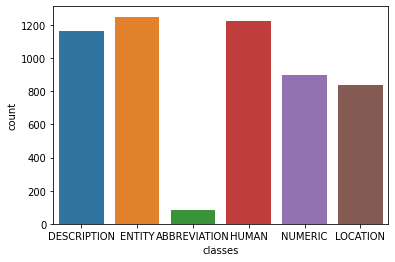

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['Category0'])
plt.xlabel('classes')



In [22]:
from sklearn.preprocessing import LabelEncoder

Category0_n = LabelEncoder()
data['Category0_n'] = Category0_n.fit_transform(data['Category0'])
data

,Questions,Category0,Category0_n
0,How did serfdom develop in and then leave Russ...,DESCRIPTION,1
1,What films featured the character Popeye Doyle ?,ENTITY,2
2,How can I find a list of celebrities ' real na...,DESCRIPTION,1
3,What fowl grabs the spotlight after the Chines...,ENTITY,2
4,What is the full form of .com ?,ABBREVIATION,0
...,...,...,...
5447,What 's the shape of a camel 's spine ?,ENTITY,2
5448,What type of currency is used in China ?,ENTITY,2
5449,What is the temperature today ?,NUMERIC,5
5450,What is the temperature for cooking ?,NUMERIC,5


In [25]:
x = data['Questions']
y = data['Category0_n']
y = y.to_numpy()
x
y

array([1, 2, 1, ..., 5, 5, 2])

In [26]:
# Spliting the data into train and test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [27]:
max_words = 1100
max_len = 200

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

tok = Tokenizer(num_words=max_words)  # Initializing the Tokenizer
tok.fit_on_texts(x_train)             # fit the train model 
seq = tok.texts_to_sequences(x_train) # Converting Text to Sequence array
seq_matrix = sequence.pad_sequences(sequences=seq, maxlen=max_len)   

seq_matrix

array([[  0,   0,   0, ...,   1, 548, 251],
       [  0,   0,   0, ..., 966,   5, 967],
       [  0,   0,   0, ...,   1,  13,   1],
       ...,
       [  0,   0,   0, ..., 152,   6,  55],
       [  0,   0,   0, ...,   4,   1,   4],
       [  0,   0,   0, ...,  44,  13,  16]], dtype=int32)

In [28]:
# Converting test data set into text sequence array for testing...!

test_seq = tok.texts_to_sequences(x_test)
test_seq_matrix = sequence.pad_sequences(test_seq, maxlen=max_len)

test_seq_matrix

array([[  0,   0,   0, ...,  66, 416,   5],
       [  0,   0,   0, ...,   1,  32,   8],
       [  0,   0,   0, ..., 478,   9,   1],
       ...,
       [  0,   0,   0, ...,   4,   1,  32],
       [  0,   0,   0, ..., 101,   1,  25],
       [  0,   0,   0, ...,   1, 252,   4]], dtype=int32)

In [29]:
import tensorflow as tf
import keras 


In [30]:
# RNN Model 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=max_words, output_dim=6, input_length=max_len))
model.add(tf.keras.layers.LSTM(64, activation='tanh'))

model.add(tf.keras.layers.Dense(220, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(6, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(seq_matrix,y_train, batch_size=60, epochs=10, validation_split=0.2)

Epoch 1/10
59/59 [==============================] - 10s 135ms/step - loss: 1.7025 - accuracy: 0.2288 - val_loss: 1.6426 - val_accuracy: 0.2222
Epoch 2/10
59/59 [==============================] - 7s 126ms/step - loss: 1.6487 - accuracy: 0.2446 - val_loss: 1.6388 - val_accuracy: 0.2772
Epoch 3/10
59/59 [==============================] - 7s 125ms/step - loss: 1.5283 - accuracy: 0.3535 - val_loss: 1.3533 - val_accuracy: 0.4536
Epoch 4/10
59/59 [==============================] - 7s 125ms/step - loss: 1.2638 - accuracy: 0.5353 - val_loss: 1.1042 - val_accuracy: 0.5624
Epoch 5/10
59/59 [==============================] - 7s 126ms/step - loss: 0.9225 - accuracy: 0.6640 - val_loss: 0.8825 - val_accuracy: 0.6495
Epoch 6/10
59/59 [==============================] - 7s 125ms/step - loss: 0.7316 - accuracy: 0.7431 - val_loss: 0.7889 - val_accuracy: 0.7090
Epoch 7/10
59/59 [==============================] - 8s 133ms/step - loss: 0.6117 - accuracy: 0.7950 - val_loss: 0.7239 - val_accuracy: 0.7342
Epoch

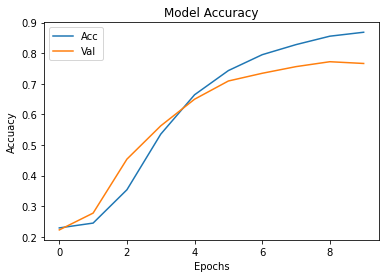

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuacy')
plt.legend(['Acc','Val'], loc = 'upper left')

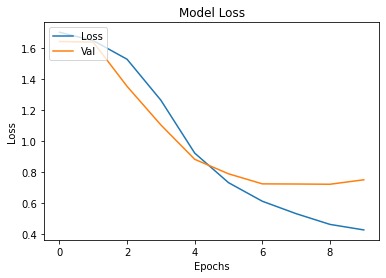

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val'], loc = 'upper left')